# Sort and plot correlations

This notebook assigns geodata to the correlations, then sorts them and plots them as a section plot.
Inputs are the correlations and a station list. 

In [8]:
import pandas as pd
from obspy import read
from obspy.geodetics import gps2dist_azimuth
from obspy import Stream
import sys
import os
from glob import glob
import matplotlib.pyplot as plt

In [9]:
## First need to assign Geodata

indir = ('./step_0/corr/')
metafile = ('../stationlist.csv')

print(indir)
traces = glob(indir+'/*.SAC')
traces.extend(glob(indir+'/*.sac'))
print('Found traces:\n')
print(traces[0])
print('...to...')
print(traces[-1])
print('Assign geographical information.\n')

meta = pd.read_csv(metafile)

for t in traces:
    tr = read(t)
    sta1 = os.path.basename(t).split('.')[1]
    try:
        sta2 = os.path.basename(t).split('--')[1].split('.')[1]
    except IndexError:
        sta2 = os.path.basename(t).split('.')[5]
    print(sta1,sta2)
    lat1 = float(meta[meta['sta']==sta1].iloc[0]['lat'])
    lat2 = float(meta[meta['sta']==sta2].iloc[0]['lat'])
    lon1 = float(meta[meta['sta']==sta1].iloc[0]['lon'])
    lon2 = float(meta[meta['sta']==sta2].iloc[0]['lon'])
    print(lat1,lon1,lat2,lon2)
    
    tr[0].stats.network = os.path.basename(t).split('.')[0]
    tr[0].stats.station = sta1
    tr[0].stats.location = ''
    tr[0].stats.channel = os.path.basename(t).split('.')[3].split('--')[0]
    tr[0].stats.sac.stlo = lon1
    tr[0].stats.sac.stla = lat1
    tr[0].stats.sac.evlo = lon2
    tr[0].stats.sac.evla = lat2
    tr[0].stats.sac.kuser0 = meta[meta['sta']==sta2].iloc[0]['net']
    
    tr[0].stats.sac.kevnm = sta2
    tr[0].stats.sac.kuser1 = ''
    try:
        tr[0].stats.sac.kuser2 = os.path.basename(t).split('--')[1].split('.')[3]
    except IndexError:
        sta2 = os.path.basename(t).split('.')[7]
    tr[0].stats.sac.user0 = 100.   
    #print lat1 > -90.
    #print lat1 < 90.
    #print type(lat1)
    #print(float(lat1))
    #print lat1,lon1,lat2,lon2
    geoinf = gps2dist_azimuth(lat1,lon1,lat2,lon2)
    tr[0].stats.sac.dist = geoinf[0]
    tr[0].stats.sac.az = geoinf[1]
    tr[0].stats.sac.baz = geoinf[2]

    tr.write(t,format='SAC')


./step_0/corr/
Found traces:

./step_0/corr/CH.BOURR..MXZ--CH.FUORN..MXZ.sac
...to...
./step_0/corr/CH.FIESA..MXZ--CH.LIENZ..MXZ.sac
Assign geographical information.

('BOURR', 'FUORN')
(47.395, 7.2313, 46.62022, 10.26352)
('FIESA', 'FUORN')
(46.43527, 8.110430000000001, 46.62022, 10.26352)
('FIESA', 'SENIN')
(46.43527, 8.110430000000001, 46.36335, 7.2993)
('FUORN', 'SENIN')
(46.62022, 10.26352, 46.36335, 7.2993)
('BOURR', 'SENIN')
(47.395, 7.2313, 46.36335, 7.2993)
('BOURR', 'FIESA')
(47.395, 7.2313, 46.43527, 8.110430000000001)
('LIENZ', 'SENIN')
(47.2946, 9.4927, 46.36335, 7.2993)
('BOURR', 'LIENZ')
(47.395, 7.2313, 47.2946, 9.4927)
('FUORN', 'LIENZ')
(46.62022, 10.26352, 47.2946, 9.4927)
('FIESA', 'LIENZ')
(46.43527, 8.110430000000001, 47.2946, 9.4927)


./step_0/corr/*B--*H.*.sac
['./step_0/corr/CH.BOURR..MXZ--CH.FUORN..MXZ.sac', './step_0/corr/CH.FIESA..MXZ--CH.FUORN..MXZ.sac', './step_0/corr/CH.FIESA..MXZ--CH.SENIN..MXZ.sac', './step_0/corr/CH.FUORN..MXZ--CH.SENIN..MXZ.sac', './step_0/corr/CH.BOURR..MXZ--CH.SENIN..MXZ.sac', './step_0/corr/CH.BOURR..MXZ--CH.FIESA..MXZ.sac', './step_0/corr/CH.LIENZ..MXZ--CH.SENIN..MXZ.sac', './step_0/corr/CH.BOURR..MXZ--CH.LIENZ..MXZ.sac', './step_0/corr/CH.FUORN..MXZ--CH.LIENZ..MXZ.sac', './step_0/corr/CH.FIESA..MXZ--CH.LIENZ..MXZ.sac']
Trace changed from BOURR--FUORN to FUORN--BOURR.
Trace changed from FIESA--FUORN to FUORN--FIESA.
Trace changed from BOURR--SENIN to SENIN--BOURR.
Trace changed from BOURR--FIESA to FIESA--BOURR.
Trace changed from BOURR--LIENZ to LIENZ--BOURR.
Trace changed from FIESA--LIENZ to LIENZ--FIESA.


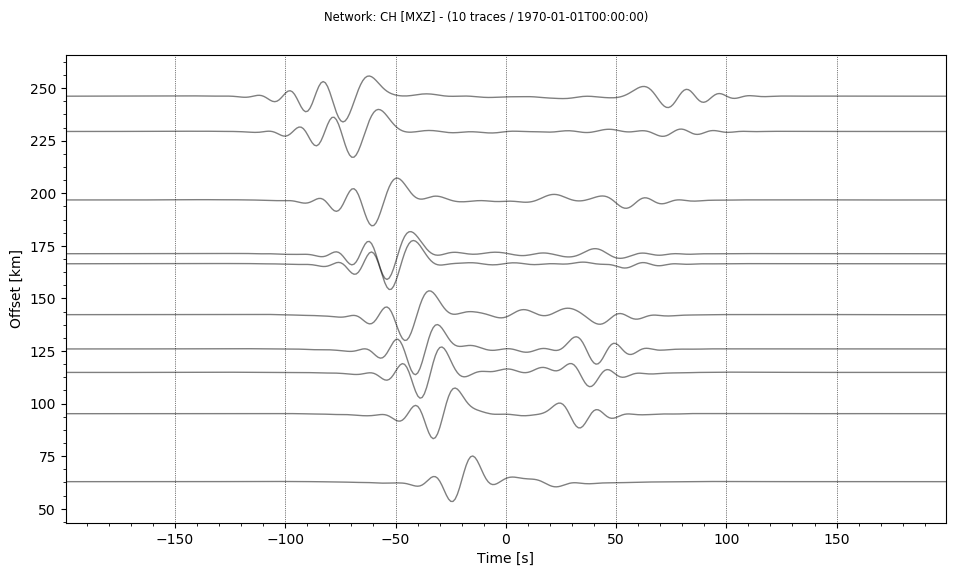

In [10]:
# Sort the correlations
# def plot_section(pathname,bandpass=None,comp='BHZ',fmt='SAC', az_selection=None,scale=4.,resol=1):

pathname = ('./step_0/corr/')
bandpass = None
comp = 'BHZ'
fmt = 'SAC'
az_selection = [0,180]
scale = 1.
resol = 1


inpt = glob(os.path.join(pathname,'*{}*{}*.{}'.format(comp[2],comp[2],fmt.lower())))
inpt.extend(glob(os.path.join(pathname,'*{}*{}*.{}'.format(comp[2],comp[2],fmt.upper()))))

print os.path.join(pathname,'*{}--*{}.*.{}'.format(comp[0],comp[1],fmt.lower()))
print inpt

traces = Stream()

for path in inpt:
    try:
        traces += read(path)[0]
    except:
        continue


for t in traces:
    t.stats.distance = t.stats.sac.dist
    sta1 = t.stats.station.strip()
    sta2 = t.stats.sac.kevnm.strip()

    if az_selection is not None:

        if t.stats.sac.baz < az_selection[0] or t.stats.sac.baz > az_selection[1]:

            if t.stats.sac.az >= az_selection[0] and t.stats.sac.az <= az_selection[1]:

                t.data = t.data[::-1]
                print("Trace changed from {}--{} to {}--{}.".format(sta1,sta2,sta2,sta1))
            else:
                traces.remove(t)

if bandpass is not None:
    traces.taper(type='cosine',max_percentage=0.05)
    traces.filter('bandpass',freqmin=bandpass[0],
        freqmax=bandpass[1],corners=bandpass[2],zerophase=True)

# maxlag seems to be requested in samples..this must be a bug in obspy.
maxlag = (traces[0].stats.npts-1) / 2.0

traces.plot(type='section',orientation='horizontal',
    reftime = traces[0].stats.starttime + maxlag,scale=scale)
plt.show()